In [1]:
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split #Preparar o dataset para treino e teste
import matplotlib.pyplot as plt #Fazer alguns graficos
from sklearn.metrics import mean_absolute_error
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
litoral = pd.read_excel("Base_de_dados_IBP.xlsx",sheet_name = "LIT") #Regressão,ensemble,pycaret
litoral = litoral.drop('CD_MUN',axis=1)
litoral = litoral.fillna(0)
y = litoral['IBP']
X = litoral.drop('IBP',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
feature_list = ['Royal','IDEB','IQ'] 

In [4]:
#Indiano

############################################
#Predict on test data
reg4 = MLPRegressor()
reg4.fit(X, y)     #AQUI DEVE SER O X-TREINO E Y-TREINO !!!!!!!
y_pred_nn = reg4.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print('Mean squared error from neural network: ', mse_nn)
print('Mean absolute error from neural network: ', mae_nn)
##############################################

#Comparison with other models..
#Neural network - from the current code
#mse_neural, mae_neural = reg4.evaluate(X_test_scaled, y_test)
#print('Mean squared error from neural net: ', mse_neural)
#print('Mean absolute error from neural net: ', mae_neural)

######################################################################
#Linear regression

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

############################################################
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)
feature_imp_dt = pd.Series(tree.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp_dt)
##############################################
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

#Feature ranking...
import pandas as pd
feature_list = list(X.columns)
feature_imp_rf = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp_rf)

###########
#GradientBoostRegressor
reg1 = GradientBoostingRegressor(random_state=1)
reg1.fit(X_train_scaled, y_train)
y_pred_boost = reg1.predict(X_test_scaled)
mse_bt = mean_squared_error(y_test, y_pred_boost)
mae_bt = mean_absolute_error(y_test, y_pred_boost)
print('Mean squared error using gradient boost regressor: ', mse_bt)
print('Mean absolute error using gradient boost regressor: ', mae_bt)
feature_imp_gdb = pd.Series(reg1.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp_gdb)

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)
print('Mean squared error using SGDRegressor: ', mean_squared_error(y_test, y_pred_sgd))
print('Mean absolute error using SGDRegressor ', mean_absolute_error(y_test, y_pred_sgd))
#feature_imp_sgdb = pd.Series(sgd.feature_importances_, index=feature_list).sort_values(ascending=False)
#print(feature_imp_sgdb)


########## KNN

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print('Mean squared error using KNN: ',mean_squared_error(y_test, y_pred_knn))
print('Mean absolute error using KNN ', mean_absolute_error(y_test, y_pred_knn))
#feature_imp_knn = pd.Series(knn.feature_importances_, index=feature_list).sort_values(ascending=False)
#print(feature_imp_knn)

########## XGB

from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred_xgb))
print('Mean squared error using xgb: ',mean_squared_error(y_test, y_pred_xgb))
print('Mean absolute error using xgb ', mean_absolute_error(y_test, y_pred_xgb))
feature_imp_xgb = pd.Series(xgb.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp_xgb)

C:\Users\USER\projeto1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\USER\projeto1\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Mean squared error from neural network:  2.319105875409436
Mean absolute error from neural network:  1.3619753536373773
Mean squared error from linear regression:  0.7316377901434034
Mean absolute error from linear regression:  0.705405779971432
Mean squared error using decision tree:  0.6446089182147757
Mean absolute error using decision tree:  0.5807003280476191
IQ       0.784222
IDEB     0.124767
Royal    0.091011
dtype: float64
Mean squared error using Random Forest:  0.253874559140342
Mean absolute error Using Random Forest:  0.3653100547492063
Royal    0.777344
IDEB     0.128672
IQ       0.093984
dtype: float64
Mean squared error using gradient boost regressor:  0.28548013618357787
Mean absolute error using gradient boost regressor:  0.39694323865964654
Royal    0.800608
IDEB     0.153698
IQ       0.045694
dtype: float64
Mean squared error using SGDRegressor:  0.7209139342755247
Mean absolute error using SGDRegressor  0.7101663202120665
Mean squared error using KNN:  0.6387080092

C:\Users\USER\projeto1\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [6]:
#R2 do modelo
print(reg4.score(X_test_scaled, y_test), lr_model.score(X_test_scaled, y_test),
      tree.score(X_test_scaled, y_test), model.score(X_test_scaled, y_test), reg1.score(X_test_scaled, y_test),
     sgd.score(X_test_scaled, y_test), knn.score(X_test_scaled, y_test), xgb.score(X_test_scaled, y_test))

-0.8315220396246494 -0.16303209425931753 0.036788907839438 0.5964338308190995 0.546192712940724 -0.1408807010763955 -0.015308290074284914 0.2753446462302729


C:\Users\USER\projeto1\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


VotingRegressor(estimators=[('RF',
                             RandomForestRegressor(n_estimators=30,
                                                   random_state=30)),
                            ('gb', GradientBoostingRegressor(random_state=1))])


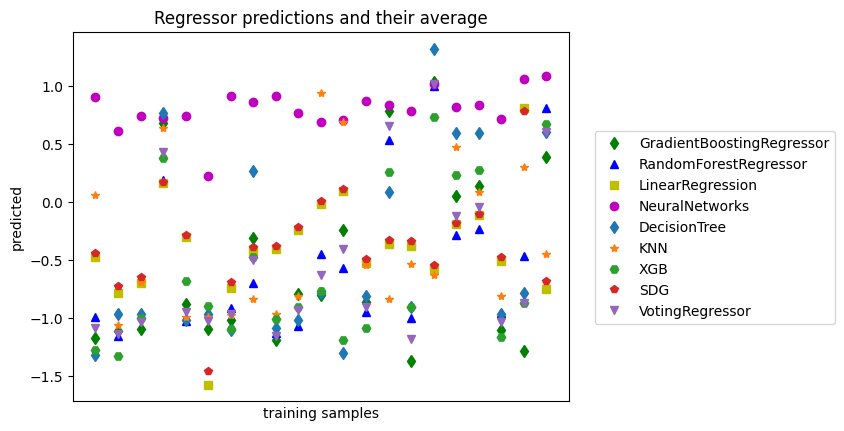

Mean squared error using ens:  0.2444436506735947
Mean absolute error using ens  0.35461095908110485
R2 0.6114254692672709


In [16]:
######GRAFICOS C/ TODOS - emsemble
#ereg = VotingRegressor(estimators=[('NN', reg4),  ('dt', tree),(´lr´,lr_model),  ('RF', model), ('gb', reg1), ('sgd', sgd), 
 #                                  ('knn', knn), ('xgb', xgb)]) # ('lr', lr_model) tirei para teste

ereg = VotingRegressor(estimators=[ ('RF', model), ('gb', reg1)]) # selecionados
print(ereg.fit(X_train_scaled, y_train))
ereg.fit(X_train_scaled, y_train)
y_pred_ereg = ereg.predict(X_test_scaled)
#pereg = ereg.fit(X_train_scaled, y_train)
pred1 = y_pred_nn
pred2 = y_pred_lr
pred3 = y_pred_tree
pred4 = y_pred_RF
pred5 = y_pred_boost
pred6 = y_pred_sgd
pred7 = y_pred_knn
pred8 = y_pred_xgb
pred9 = y_pred_ereg
plt.figure()
plt.plot(pred5, 'gd', label='GradientBoostingRegressor')
plt.plot(pred4, 'b^', label='RandomForestRegressor')
plt.plot(pred2, 'ys', label='LinearRegression')
plt.plot(pred1, 'mo', label='NeuralNetworks')
plt.plot(pred3, 'd', label='DecisionTree')
plt.plot(pred7, '*', label='KNN')
plt.plot(pred8, 'H', label='XGB')
plt.plot(pred6, 'p', label='SDG')
plt.plot(pred9, 'v', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
plt.legend(bbox_to_anchor = (1.55, 0.75))
plt.show()

y_pred_ens = ereg.predict(X_test_scaled)
print('Mean squared error using ens: ',mean_squared_error(y_test, y_pred_ens))
print('Mean absolute error using ens ', mean_absolute_error(y_test, y_pred_ens))
print('R2', ereg.score(X_test_scaled, y_test))

In [8]:
#feature_ensemb = pd.Series(ereg.feature_importances_, index=feature_list).sort_values(ascending=False)
#print(feature_ensemb)

AttributeError: 'VotingRegressor' object has no attribute 'feature_importances_'

Text(0, 0.5, 'MAE')

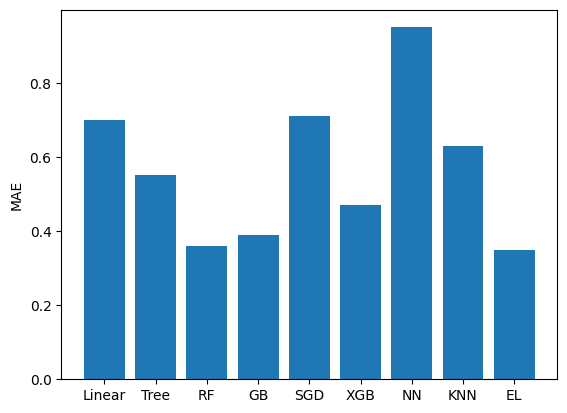

In [9]:
estimators=[('NN', reg4), ('lr', lr_model), ('dt', tree), ('RF', model), ('gb', reg1), ('sgd', sgd), 
                                   ('knn', knn), ('xgb', xgb)]
models = {'model' : ['Linear','Tree','RF','GB','SGD','XGB','NN','KNN','EL'], 'MAE': [0.7,0.55,0.36,0.39,0.71,0.47,0.95,0.63,0.35]}
        # 'MSE':[0.14, 0.29, 0.20, 0.28,0.14,0.26,0.13,0.17]}
plt.bar(models['model'], models['MAE'])
plt.ylabel("MAE")

C:\Users\USER\projeto1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\projeto1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\projeto1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\projeto1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

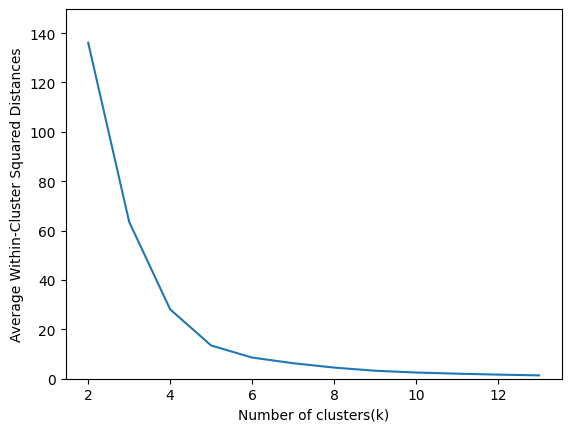

In [3]:
#Kmeans-importação
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

kmean = pd.read_excel("Base_de_dados_IBP.xlsx",sheet_name = "K_means")
kmean.index = kmean['Nome']
kmean = kmean.drop('Nome',axis=1)
kmean = kmean.fillna(0)
scaler=StandardScaler()
scaler.fit(kmean)
X0 = scaler.transform(kmean)
inertia = []
for n_clusters in range(2, 14):
     kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X0)
     inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)

In [4]:
#PRINCIPAL COMPONENT ANALISES
#Example 3.10 Principal Component Analysis Iris 
kmeans = KMeans(n_clusters=5, random_state=0)
#X0 = X.values
pca = decomposition.PCA(n_components=2)
pca.fit(X0)
X1 = pca.transform(X0)


C:\Users\USER\projeto1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'PCA Data')

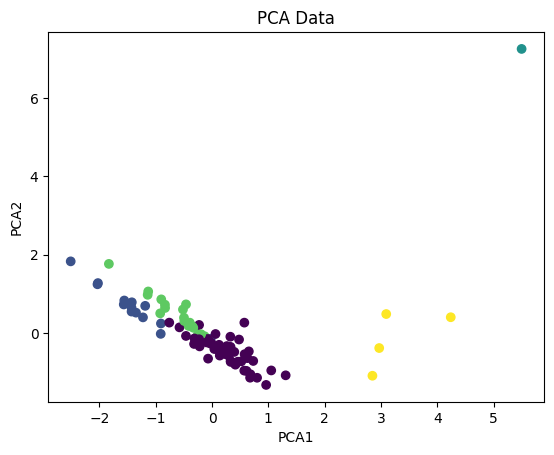

In [5]:
#K-means + dendograma (geral, completo em outro pynb)
#kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X0)
kmeans.labels_
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_)
plt.scatter
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Data')

Text(0, 0.5, 'distance')

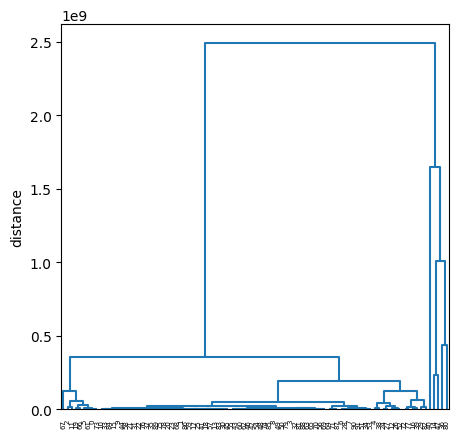

In [6]:
#Dendograma
W = linkage(kmean, method='complete')
fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(W, ax=ax, color_threshold=0)
plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize'] = 0
ax.set_ylabel('distance')

In [7]:
Y = X0
Y = pd.DataFrame(Y)
Y['cluster'] = kmeans.labels_
Y.to_excel(r'C:\Users\USER\Desktop\File.xlsx', index=False)

In [9]:
kmean

,ANP,%_MAT,IBP,IQ
Nome,,,,
ANGRA DOS REIS,2.725357e+08,0.701735,-1.171029,0.71
APERIBE,2.050608e+07,0.577241,-0.810596,0.00
ARARUAMA,2.909146e+08,0.645202,-0.843765,0.86
AREAL,3.485764e+07,0.629442,-0.733177,0.95
ARMACAO DOS BUZIOS,2.149325e+08,0.812422,-1.226903,0.81
...,...,...,...,...
TRES RIOS,6.624567e+07,0.798880,-1.143950,0.92
VALENCA,3.320032e+07,0.676126,-0.999537,0.79
VARRE-SAI,1.952960e+07,0.703922,-0.390891,0.83
